# Max-Cut Sample - Hybrid


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import dimod

### Helper Functions

In [2]:
def draw_graph(G,cut,pos):
    colors = [ 'g' if n in cut else 'r' for n in G.nodes() ]
    nx.draw(G,with_labels=False,alpha=0.6,node_size=50,node_color=colors,pos=pos)
    
def cut_size(G,cut):
    edges = 0
    for c in cut:
        for n in G.neighbors(c):
            if n not in cut:
                edges += 1
    return edges
    


## Problem as Graph

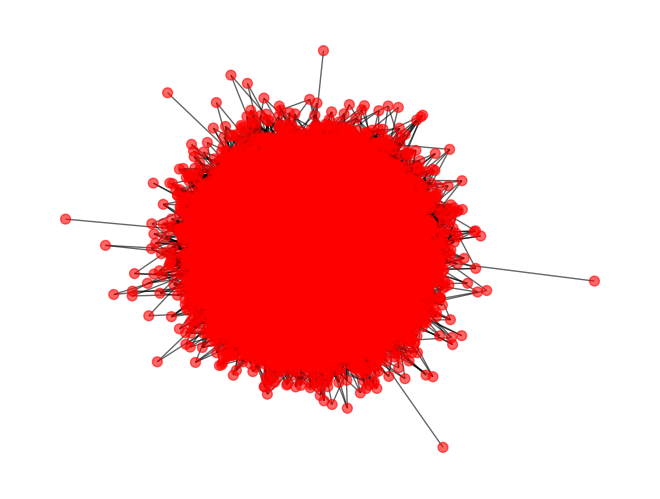

In [3]:
# fixed graph
#G = nx.Graph()
#G.add_nodes_from([0,1,2,3,4])
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,4),(2,4),(3,4),(1,4)])

# loaded sample graph
G = nx.read_edgelist('../sample_graphs/40000-nodes-sample.dat',nodetype=int)

#n = 4
#p = 0.3
#H = nx.gnp_random_graph(n, p)
pos = nx.spring_layout(G)

#nx.draw(G,with_labels=True,alpha=0.6,node_size=300,pos=pos)
draw_graph(G,{},pos)

In [4]:
print('Graph: ',len(G.nodes()), 'nodes, density: ',nx.density(G))

Graph:  40000 nodes, density:  0.0002987587189679742


## Exact Solver

In [5]:
exactsolver = dimod.ExactSolver()

In [6]:
#import time

#ts_start = time.time()
#cut = dnx.maximum_cut(G, exactsolver)
#ts_stop = time.time()
#print(cut)
#print('elapsed time of exact solver (s): ',round(ts_stop - ts_start,2))

In [7]:
#draw_graph(G,cut,pos)

In [8]:
#print('cut-size: ',cut_size(G,cut))

## Hybrid Solver

In [9]:
from dwave.system import LeapHybridSampler

label = 'max-cut, n: ' + str(len(G.nodes())) + ', d: ' + str(round(nx.density(G),2)) + ' hybrid'

hybridsampler = LeapHybridSampler()
cut = dnx.maximum_cut(G, hybridsampler,label=label)

In [10]:
cut

{0,
 1,
 5,
 6,
 7,
 11,
 13,
 14,
 19,
 20,
 22,
 25,
 28,
 30,
 32,
 37,
 44,
 46,
 48,
 49,
 53,
 59,
 60,
 61,
 63,
 66,
 68,
 69,
 70,
 72,
 73,
 75,
 76,
 77,
 82,
 84,
 88,
 89,
 91,
 94,
 95,
 97,
 99,
 101,
 102,
 103,
 105,
 106,
 107,
 108,
 111,
 112,
 118,
 120,
 121,
 122,
 123,
 124,
 128,
 129,
 131,
 132,
 133,
 134,
 136,
 137,
 145,
 146,
 149,
 152,
 154,
 155,
 158,
 159,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 173,
 176,
 182,
 184,
 189,
 190,
 192,
 198,
 200,
 201,
 202,
 205,
 208,
 209,
 212,
 215,
 216,
 217,
 218,
 222,
 223,
 224,
 225,
 226,
 230,
 231,
 232,
 235,
 236,
 237,
 239,
 241,
 243,
 246,
 247,
 249,
 251,
 252,
 254,
 256,
 257,
 259,
 261,
 262,
 264,
 266,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 277,
 281,
 282,
 283,
 284,
 288,
 290,
 293,
 294,
 296,
 297,
 299,
 300,
 301,
 303,
 307,
 313,
 314,
 315,
 316,
 317,
 319,
 320,
 321,
 324,
 326,
 328,
 329,
 330,
 331,
 333,
 335,
 337,
 341,
 344,
 345,
 346,
 347

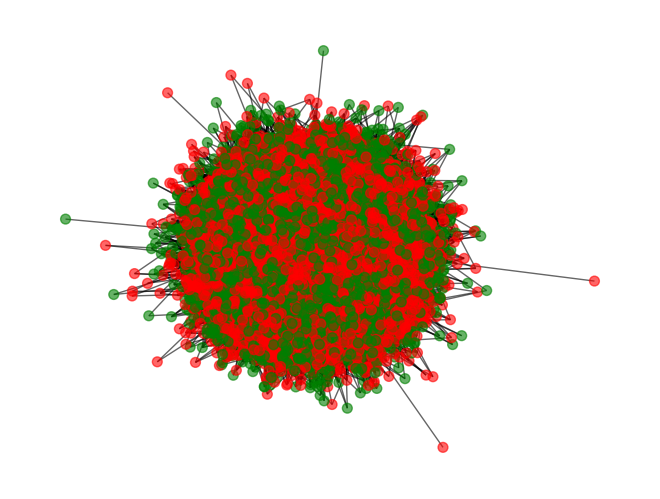

In [11]:
draw_graph(G,cut,pos)

In [12]:
print('cut-size: ',cut_size(G,cut))

cut-size:  170978


In [13]:
len(list(G.neighbors(3455)))

6